The following code produce the climate change factors used by ecosim

In [3]:
# Get the current directory
import os
current_dir = os.getcwd()

# Print the current directory
print("Current directory:", current_dir)

#specify the output file
# the CO2 time series covers from 1749 to 2022
# the CH4 time series covers from 1750 to 2022
ncf_co2_ch4='../input_data/fatm_hist_GHGs_1750-2022.nc'
yearb=1750
yeare=2022
#specify the source file for time series data of atmospheric co2 and ch4
fco2_ch4='../input_data/atms_ghg_1750-now.csv'

co2s=[]
ch4s=[]
n2os=[]
unit_co2='ppm'
unit_ch4='ppb'
unit_n2o='ppb'
with open(fco2_ch4,"r") as infile:
    #read and skip the first line
    dat_src=infile.readline()
    line=infile.readline().strip()

    while line:
        #split string by spaces, including spaces, tabs, and newline characters
        sarr=line.split(',')
        if len(sarr) ==3:
            year=float(sarr[0])
            dat1=float(sarr[1])
            if 'CO2' in sarr[2]:
                co2s.append(year)
                co2s.append(dat1)
                
            elif 'CH4' in sarr[2]:
                ch4s.append(year)
                ch4s.append(dat1)
            elif 'N2O' in sarr[2]:
                n2os.append(year)
                n2os.append(dat1)
        line=infile.readline().strip()

len_co2s=int(len(co2s)/2)
len_ch4s=int(len(ch4s)/2)
len_n2os=int(len(n2os)/2)
print('# of co2 data: %d'%(len_co2s))    
print('# of ch4 data: %d'%(len_ch4s))   
print('# of n2o data: %d'%(len_n2os))   

import numpy as np

co2_arr=np.array(co2s)
ch4_arr=np.array(ch4s)
n2o_arr=np.array(n2os)

co2s=co2_arr.reshape(len_co2s,2)
ch4s=ch4_arr.reshape(len_ch4s,2)
n2os=ch4_arr.reshape(len_n2os,2)

Current directory: /Users/jinyuntang/work/github/ecosim2/EcoSIM/python_tools
# of co2 data: 106
# of ch4 data: 91
# of n2o data: 91


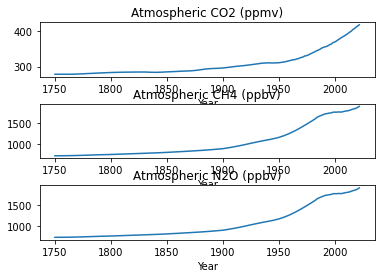

In [4]:
#plot time series data
import matplotlib.pyplot as plt
plt.subplot(3,1,1)
plt.plot(co2s[:,0], co2s[:,1])
plt.xlabel('Year')
plt.title('Atmospheric CO2 (ppmv)')
plt.subplot(3,1,2)
plt.plot(ch4s[:,0],ch4s[:,1])
plt.xlabel('Year')
plt.title('Atmospheric CH4 (ppbv)')
plt.subplot(3,1,3)
plt.plot(n2os[:,0],n2os[:,1])
plt.xlabel('Year')
plt.title('Atmospheric N2O (ppbv)')
plt.subplots_adjust(hspace=0.5)


write as netcdf file

File to write: ../input_data/fatm_hist_GHGs_1750-2022.nc


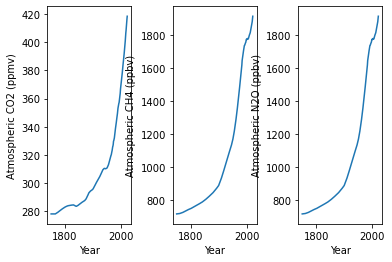

In [5]:
from netCDF4 import Dataset
from datetime import datetime
from array import array
import warnings
from scipy.interpolate import interp1d

#first interpolate data to 1750 to 2022
#create function
fch4=interp1d(ch4s[:,0],ch4s[:,1])
fco2=interp1d(co2s[:,0],co2s[:,1])
fn2o=interp1d(n2os[:,0],n2os[:,1])
#interpolate
year_int=np.array(range(1750, 2023))
ch4_int=fch4(year_int)
co2_int=fco2(year_int)
n2o_int=fn2o(year_int)
#re-check the interpolated data 
plt.subplot(1,3,1)
plt.plot(year_int, co2_int)
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2 (ppmv)')
plt.subplot(1,3,2)
plt.plot(year_int,ch4_int)
plt.xlabel('Year')
plt.ylabel('Atmospheric CH4 (ppbv)')
plt.subplot(1,3,3)
plt.plot(year_int,n2o_int)
plt.xlabel('Year')
plt.ylabel('Atmospheric N2O (ppbv)')

plt.subplots_adjust(wspace=0.5)

current_dateTime = datetime.now()
print('File to write: %s'%ncf_co2_ch4)
nc_fid = Dataset(ncf_co2_ch4, 'w')

nc_fid.description='historical atmospheric CO2 and CH4 time series created on %4d/%02d/%02d/%02d:%02d:%02d'% \
      (current_dateTime.year,current_dateTime.month,current_dateTime.day, \
      current_dateTime.hour,current_dateTime.minute,current_dateTime.second)+'; data source:'+dat_src

nc_fid.createDimension('time', None)
w_nc_var=nc_fid.createVariable('CH4','f4', ('time'))
w_nc_var.long_name='Atmospheric CH4 concentrations'
w_nc_var.units='ppbv'

w_nc_var=nc_fid.createVariable('CO2', 'f4', ('time'))
w_nc_var.long_name='Atmospheric CO2 concentration'
w_nc_var.units='ppmv'

w_nc_var=nc_fid.createVariable('N2O', 'f4', ('time'))
w_nc_var.long_name='Atmospheric N2O concentration'
w_nc_var.units='ppbv'

w_nc_var=nc_fid.createVariable('year', 'i4', ('time'))
w_nc_var.long_name='Year AD'

for k in range(len(year_int)):
    nc_fid.variables['year'][k]=int(year_int[k])
    nc_fid.variables['CO2'][k]=co2_int[k]
    nc_fid.variables['CH4'][k]=ch4_int[k]
    nc_fid.variables['N2O'][k]=n2o_int[k]
    

nc_fid.close()
